In [19]:
from qiskit import *

In [20]:
ckt = QuantumCircuit(3, 3)

In [21]:
ckt.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [22]:
# ckt.x(0) c-not gate to be teleported to c2
ckt.h(0)
ckt.barrier()
ckt.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [23]:
ckt.h(1)
ckt.cx(1, 2)
ckt.draw()

┌───┐ ░           
q_0: ┤ H ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [24]:
ckt.cx(0, 1)
ckt.h(0)
ckt.draw()

┌───┐ ░                ┌───┐
q_0: ┤ H ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

In [25]:
ckt.barrier()
ckt.measure([0, 1], [0, 1])
ckt.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [26]:
ckt.barrier()
ckt.cx(1, 2)
ckt.cz(0, 2)
ckt.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ H ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

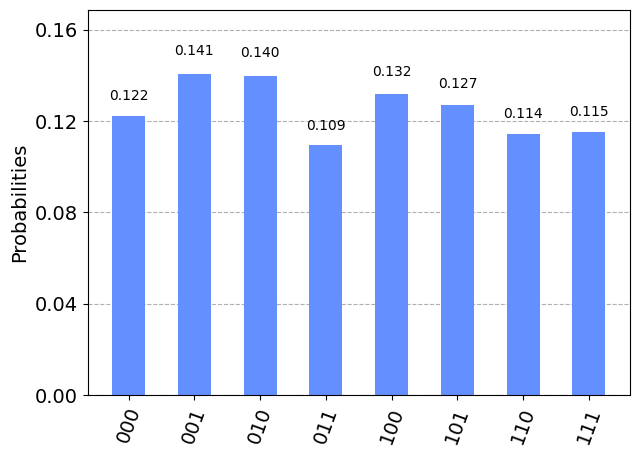

In [27]:
ckt.measure(2, 2)
simulator = Aer.get_backend("qasm_simulator")
result = execute(ckt, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)